# Major 2

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [2]:
from matplotlib import pylab 
params = {'xtick.labelsize': 18, 'ytick.labelsize': 18, 'axes.titlesize' : 22, 'axes.labelsize' : 20, 'legend.fontsize': 18, 'legend.title_fontsize': 22, 'figure.titlesize': 24 } 
pylab.rcParams.update(params)

In [3]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    import numpy as np
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

In [4]:
train = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

In [5]:
train = train.drop(columns=train.columns[0])
test = test.drop(columns=test.columns[0])

### Part 1

/home/itai/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


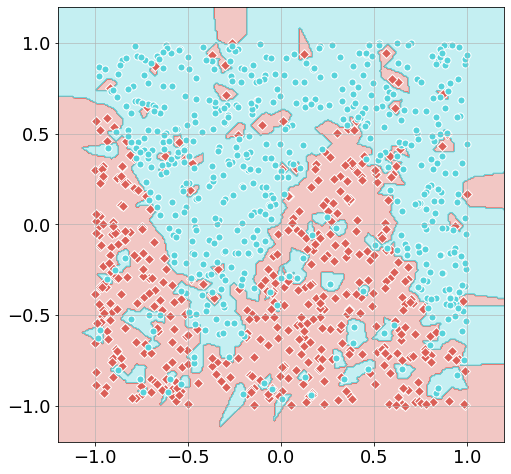

In [6]:
# Q1

from sklearn.neighbors import KNeighborsClassifier

labels = ['PCR_01','PCR_09']
target = 'spread'
Xtrain = train[labels]
Ytrain = train[target]
Xtest = test[labels]
Ytest = test[target]

kNNclass = KNeighborsClassifier(1)
kNNclass.fit(Xtrain, Ytrain)

predY = kNNclass.predict(Xtrain)
visualize_clf(kNNclass, Xtrain, Ytrain, '','','')

In [7]:
# Q2

from sklearn.model_selection import cross_validate

# param_space = list(range(1, 20, 2)) + list(range(20, 871, 85))
param_space = np.floor(np.logspace(0, np.log10(871), 20)).astype(int)
test_scores = []
train_scores = []
for lmbda in param_space:
    estimator = KNeighborsClassifier(lmbda)
    scores = cross_validate(estimator, Xtrain, Ytrain, cv=8, return_train_score=True)
    test_scores.append(np.mean(scores['test_score']))
    train_scores.append(np.mean(scores['train_score']))

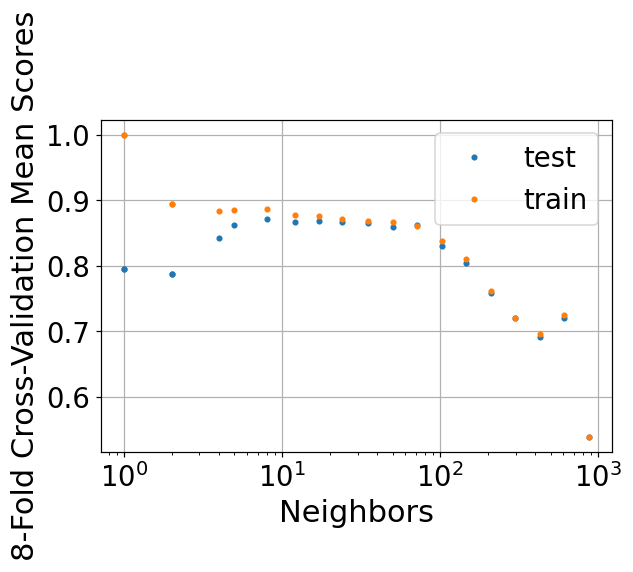

In [8]:
plt.figure(dpi=110)
plt.plot(param_space, test_scores, '.', label='test')
plt.plot(param_space, train_scores, '.', label='train')
plt.xlabel('Neighbors')
plt.ylabel('8-Fold Cross-Validation Mean Scores')
plt.semilogx()
plt.grid()
plt.legend()
plt.show()

/home/itai/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


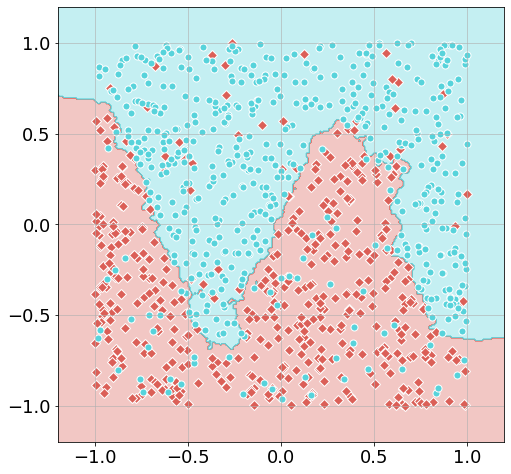

optimal k: 8, test_score: 0.872


In [9]:
# Q4 
opt_i = np.argmax(test_scores)
k_opt = param_space[opt_i]
test_score_opt = test_scores[opt_i]

kNNclass = KNeighborsClassifier(k_opt)
kNNclass.fit(Xtrain, Ytrain)
visualize_clf(kNNclass, Xtrain, Ytrain, '','','')

print(f"optimal k: {k_opt}, test_score: {kNNclass.score(Xtest, Ytest)}")

/home/itai/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


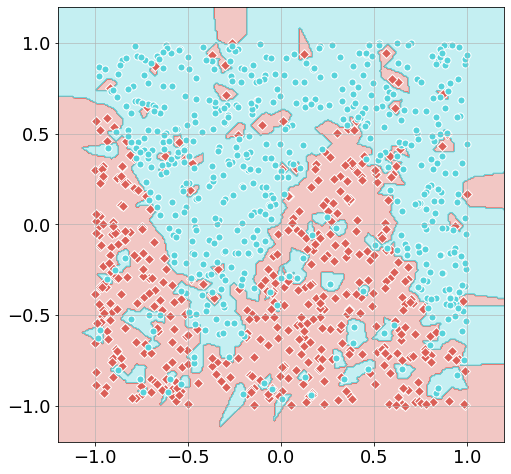

/home/itai/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


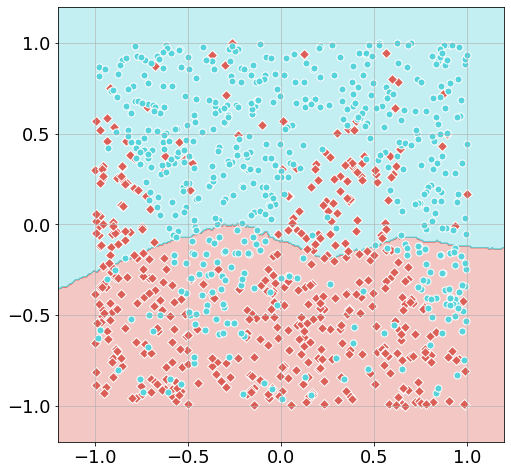

In [10]:
# Q5

kNNclass1 = KNeighborsClassifier(1)
kNNclass501 = KNeighborsClassifier(501)

kNNclass1.fit(Xtrain, Ytrain)
kNNclass501.fit(Xtrain, Ytrain)

visualize_clf(kNNclass1, Xtrain, Ytrain, '','','')
visualize_clf(kNNclass501, Xtrain, Ytrain, '','','')

In [11]:
# Q6 - Process

Xtrain = train.drop(columns=['spread','risk'])
Ytrain = train['spread']

# param_space = list(range(1, 20, 2)) + list(range(20, 871, 85))
param_space = np.floor(np.logspace(0, np.log10(871), 20)).astype(int)
test_scores = []
train_scores = []
for lmbda in param_space:
    estimator = KNeighborsClassifier(lmbda)
    scores = cross_validate(estimator, Xtrain, Ytrain, cv=8, return_train_score=True)
    test_scores.append(np.mean(scores['test_score']))
    train_scores.append(np.mean(scores['train_score']))

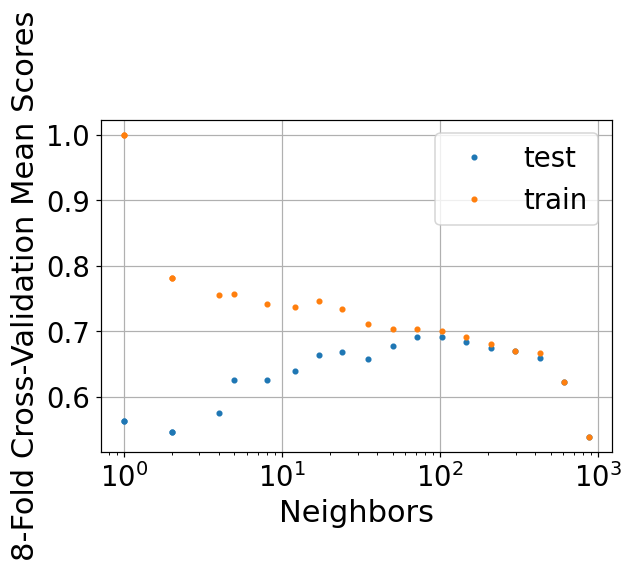

In [12]:
# Q6 - Visualize

plt.figure(dpi=110)
plt.plot(param_space, test_scores, '.', label='test')
plt.plot(param_space, train_scores, '.', label='train')
plt.xlabel('Neighbors')
plt.ylabel('8-Fold Cross-Validation Mean Scores')
plt.semilogx()
plt.grid()
plt.legend()
plt.show()

### Part 2

Test accuracy is 0.72
Train accuracy is 0.712


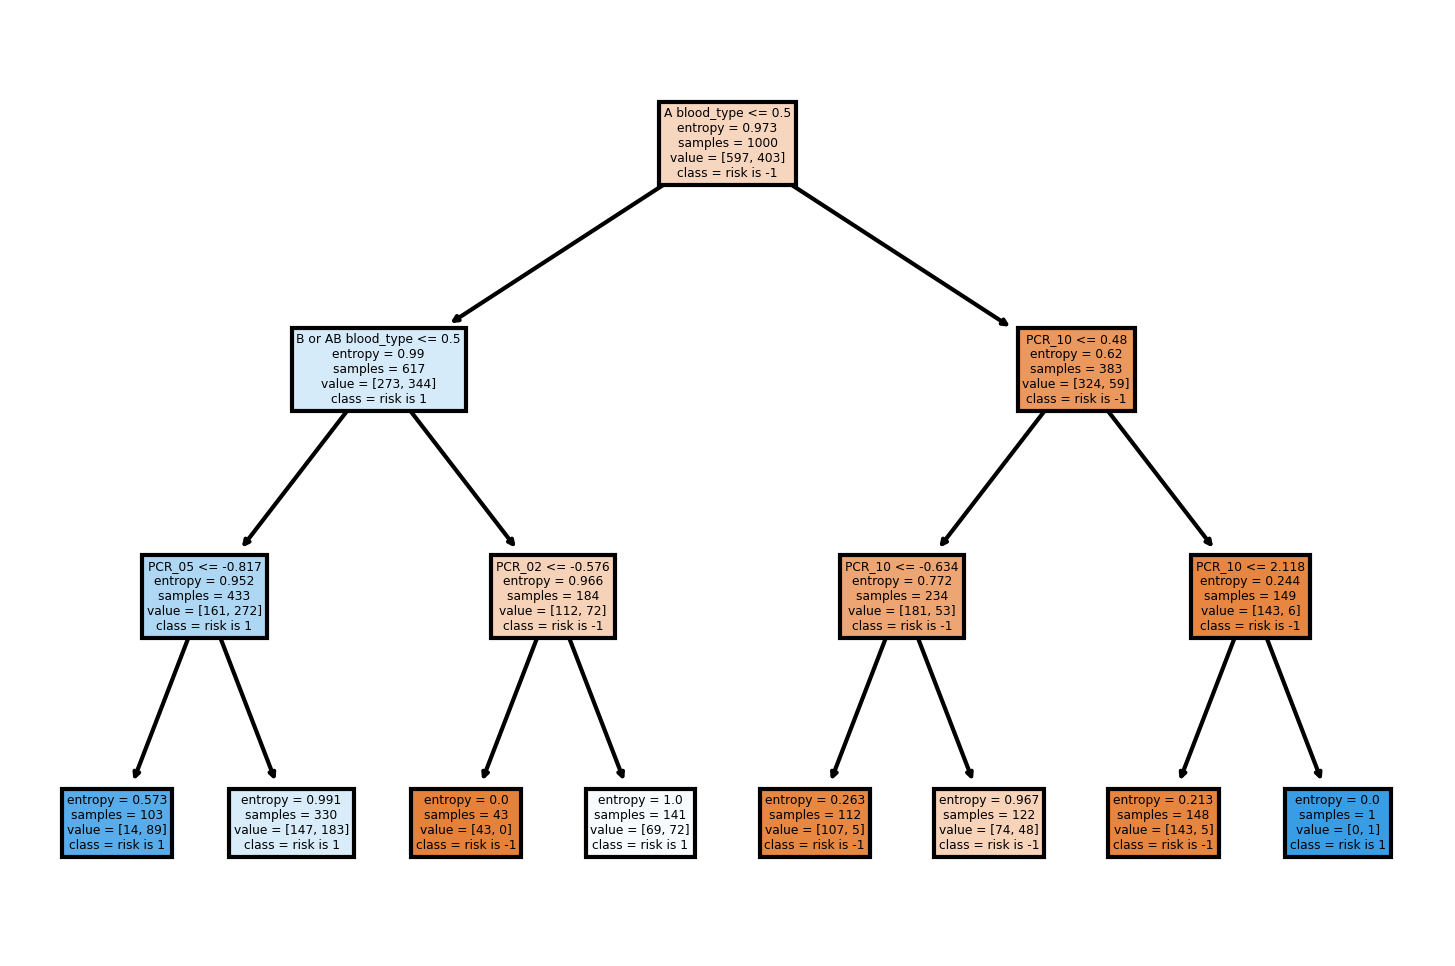

In [30]:
# Q7
from sklearn.tree import DecisionTreeClassifier, plot_tree

target = 'risk'
Xtrain = train.drop(columns=['risk','spread'])
Ytrain = train[target]
Xtest = test.drop(columns=['risk','spread'])
Ytest = test[target]

id3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
id3.fit(Xtrain, Ytrain)
plt.figure(dpi=300)
plot_tree(id3, filled=True, feature_names=Xtrain.columns, class_names=['risk is -1', 'risk is 1'])
print(f"Test accuracy is {id3.score(Xtest, Ytest)}")
print(f"Train accuracy is {id3.score(Xtrain, Ytrain)}")

In [22]:
# Q8 - learn

from sklearn.model_selection import GridSearchCV

max_depth_space = [3, 4, 5, 6, 7, 8, 9]
min_samples_leaf_space = [6, 9, 12, 15, 18, 21, 24, 27, 30]
folds = 8
gs = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid={'max_depth': max_depth_space, 'min_samples_leaf': min_samples_leaf_space}, cv=folds, return_train_score=True)

gs.fit(Xtrain, Ytrain)
cv_results = pd.DataFrame(gs.cv_results_)

mean_train_score = cv_results.pivot_table(values='mean_train_score', index='param_max_depth', columns='param_min_samples_leaf')
mean_test_score = cv_results.pivot_table(values='mean_test_score', index='param_max_depth', columns='param_min_samples_leaf')

Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=18)
With Mean Test Score: 0.867


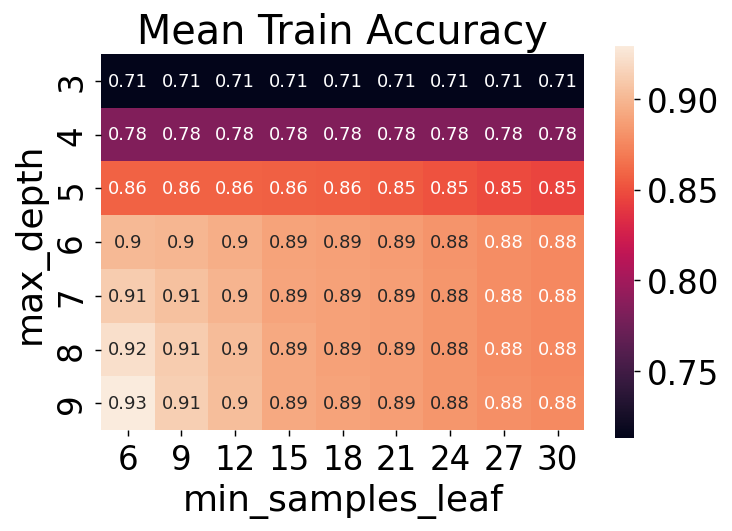

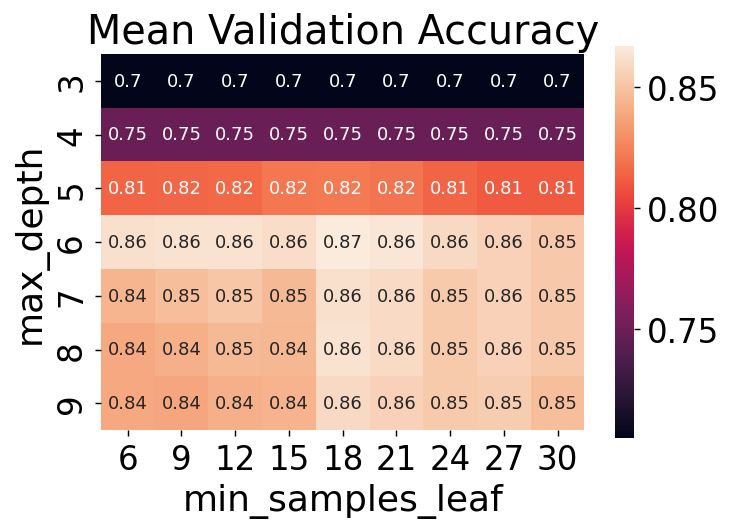

In [25]:
# Q8 - plot

print(f"Best Estimator: {gs.best_estimator_}")
print(f"With Mean Test Score: {gs.best_score_}")
plt.figure(dpi=130)
sns.heatmap(mean_train_score, square=True, annot=True)
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.title('Mean Train Accuracy')
plt.show()
plt.figure(dpi=130)
sns.heatmap(mean_test_score, square=True, annot=True)
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.title('Mean Validation Accuracy')
plt.show()

Test accuracy is: 0.848


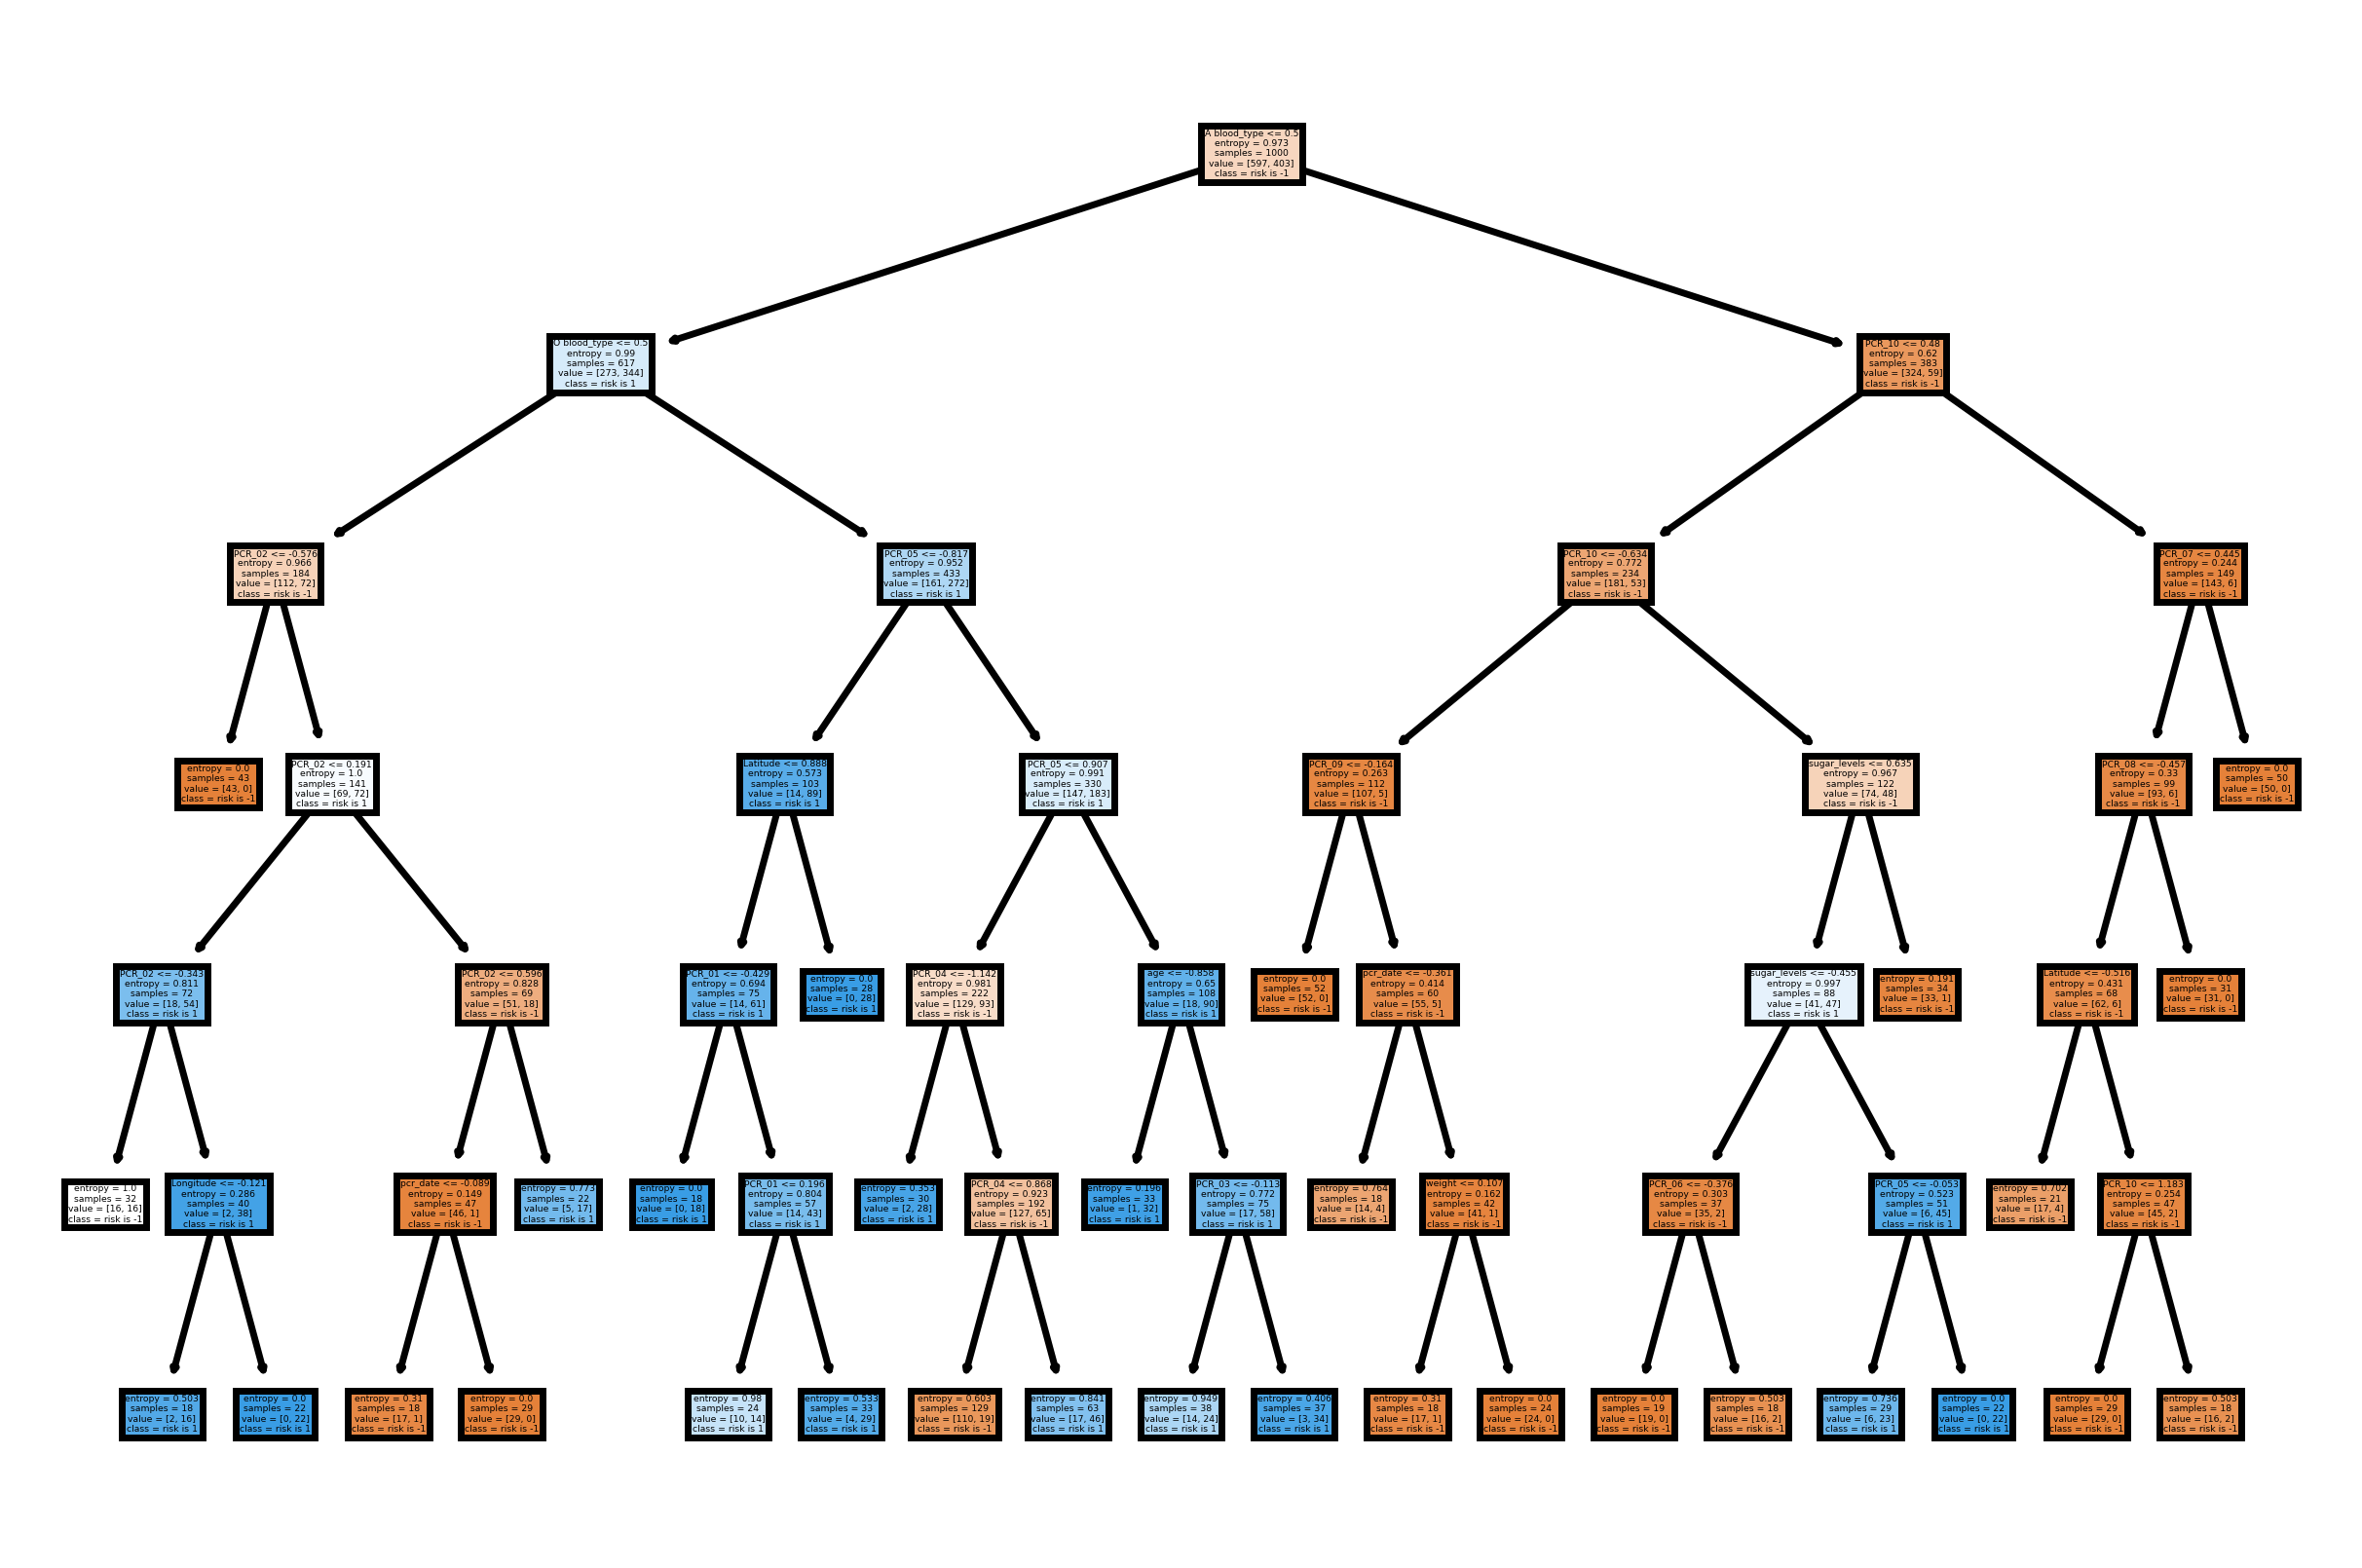

In [38]:
# Q9 

id3 = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=18)
id3.fit(Xtrain, Ytrain)
plt.figure(dpi=500)
plot_tree(id3, filled=True, feature_names=Xtrain.columns, class_names=['risk is -1', 'risk is 1'])
plt.savefig('q9',dpi=500)
print(f"Test accuracy is: {id3.score(Xtest, Ytest)}")